In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
X = df[['latitude','longitude','median_income']]

In [6]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [9]:
X_scaled

array([[ 1.05254828, -1.32783522,  2.34476576],
       [ 1.04318455, -1.32284391,  2.33223796],
       [ 1.03850269, -1.33282653,  1.7826994 ],
       ...,
       [ 1.77823747, -0.8237132 , -1.14259331],
       [ 1.77823747, -0.87362627, -1.05458292],
       [ 1.75014627, -0.83369581, -0.78012947]])

In [39]:
from sklearn.cluster import KMeans
k=2
kmeans = KMeans(n_clusters=k,random_state=13)
kmeans_pred = kmeans.fit_predict(X_scaled)

In [40]:
## silhouette score

In [41]:
from sklearn.metrics import silhouette_score
silhouette_score(X,kmeans_pred)

np.float64(0.566387067404534)

In [42]:
silhouette_scores = []

K = range(2,11)


for k in K:
  kmeans = KMeans(n_clusters=k,random_state=42)
  labels = kmeans.fit_predict(X_scaled)
  score = silhouette_score(X_scaled,labels)
  silhouette_scores.append(score)
  print(f'k={k}, silhouette score={score:.4f}')

k=2, silhouette score=0.5482
k=3, silhouette score=0.5180
k=4, silhouette score=0.4352
k=5, silhouette score=0.4101
k=6, silhouette score=0.3985
k=7, silhouette score=0.3723
k=8, silhouette score=0.3667
k=9, silhouette score=0.3462
k=10, silhouette score=0.3537


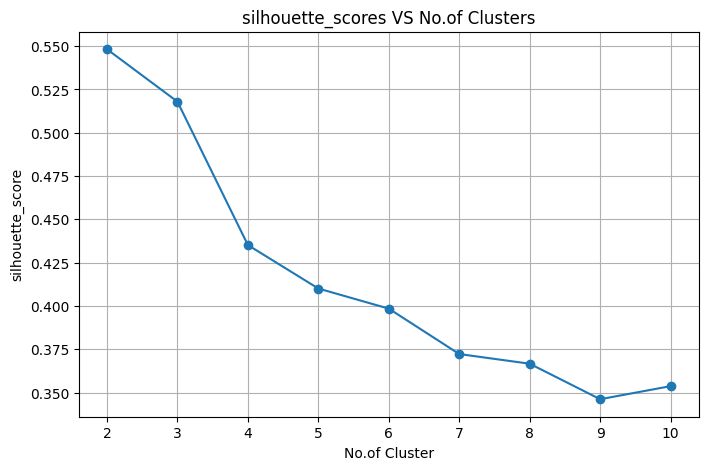

In [24]:
plt.figure(figsize=(8,5))
plt.plot(K,silhouette_scores,marker='o')
plt.title('silhouette_scores VS No.of Clusters')
plt.xlabel('No.of Cluster')
plt.ylabel('silhouette_score')
plt.grid(True)
plt.show()

In [25]:
## Selectting the best K

best_K = K[silhouette_scores.index(max(silhouette_scores))]

In [26]:
print(best_K)

2


In [28]:
from sklearn.cluster import KMeans
k=2
kmeans_optimal = KMeans(n_clusters=k,random_state=42)
df['cluster'] = kmeans.fit_predict(X_scaled)

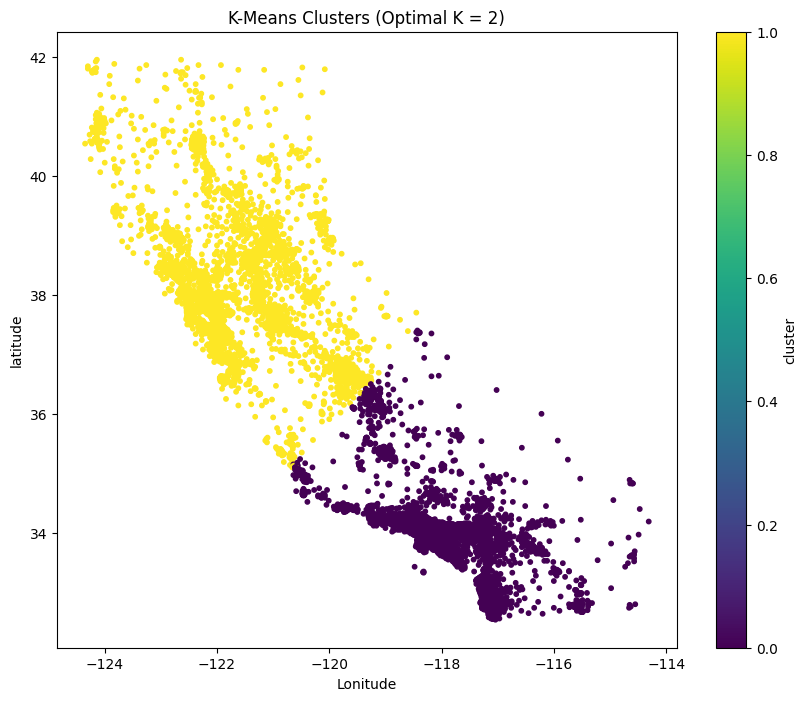

In [31]:
plt.figure(figsize=(10,8))
plt.scatter(df['longitude'],df['latitude'],c=df['cluster'], cmap='viridis',s=10)
plt.title(f'K-Means Clusters (Optimal K = {best_K})'):

plt.xlabel('Lonitude')
plt.ylabel('latitude')
plt.colorbar(label='cluster')
plt.show()

In [35]:
for k in K:
  kmeans = KMeans(n_clusters=k,random_state=42)
  df[f'cluster_{k}'] = kmeans.fit_predict(X_scaled)

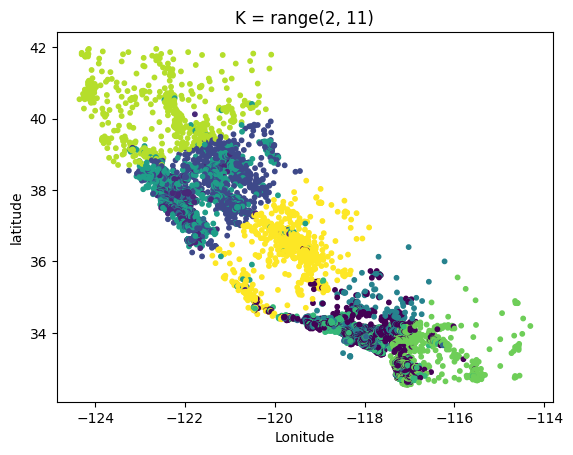

In [36]:
plt.scatter(df['longitude'],df['latitude'],c=df[f'cluster_{k}'], cmap='viridis',s=10)
plt.title(f'K = {K}')

plt.xlabel('Lonitude')
plt.ylabel('latitude')
plt.show()

In [38]:
## comparing median income by EACH cluster K
for k in K:
  print(f'\n=== Cluster Summary for K = {k} ====')
  print(df.groupby(f'cluster_{k}')['median_income'].describe())


=== Cluster Summary for K = 2 ====
             count      mean       std     min     25%     50%      75%  \
cluster_2                                                                 
0          11937.0  3.922444  1.927142  0.4999  2.5927  3.5882  4.81250   
1           8703.0  3.799659  1.859465  0.4999  2.5313  3.4620  4.66605   

               max  
cluster_2           
0          15.0001  
1          15.0001  

=== Cluster Summary for K = 3 ====
            count      mean       std     min       25%     50%       75%  \
cluster_3                                                                   
0          9959.0  3.250999  1.089580  0.4999  2.388400  3.2143  4.090700   
1          2324.0  7.440986  2.120970  5.0620  5.954675  6.6515  8.249275   
2          8357.0  3.616261  1.477099  0.4999  2.519500  3.4051  4.533300   

               max  
cluster_3           
0           5.5842  
1          15.0001  
2           8.6340  

=== Cluster Summary for K = 4 ====
            coun

🗺 Geographic Distribution

Longitude & Latitude create a clear spatial pattern:

Clusters align roughly with California’s geography.

Coastal cities like San Francisco, Los Angeles, San Diego form distinct high-income clusters.

Central Valley and inland desert regions form low-income clusters.

💵 Median Income Trends

High Median Income Clusters:
Found along the coast (urbanized, tech or service-driven economies).

Medium Income Clusters:
Surround major metropolitan areas (suburbs, mixed-use regions).

Low Income Clusters:
Inland and rural regions, more agricultural and less urbanized.

🏘 Housing Market Segments

The clusters effectively segment the housing market into:

Urban High-Income Markets – expensive housing near coasts and metros.

Suburban Middle-Income Markets – transitional areas between coast and interior.

Rural Low-Income Markets – affordable housing but limited access to urban infrastructure.

In [44]:
### Lets perform DBSCAN on Housing data

from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.3, min_samples=10)
df['DBSCAN_Cluster'] = dbscan.fit_predict(X_scaled)

# Remove noise points (-1) for silhouette computation
mask = df['DBSCAN_Cluster'] != -1
if len(set(df['DBSCAN_Cluster'][mask])) > 1:
    dbscan_silhouette = silhouette_score(X_scaled[mask], df['DBSCAN_Cluster'][mask])
else:
    dbscan_silhouette = -1  # invalid if only one cluster

print(f"DBSCAN Silhouette Score: {dbscan_silhouette:.3f}")

DBSCAN Silhouette Score: -0.006


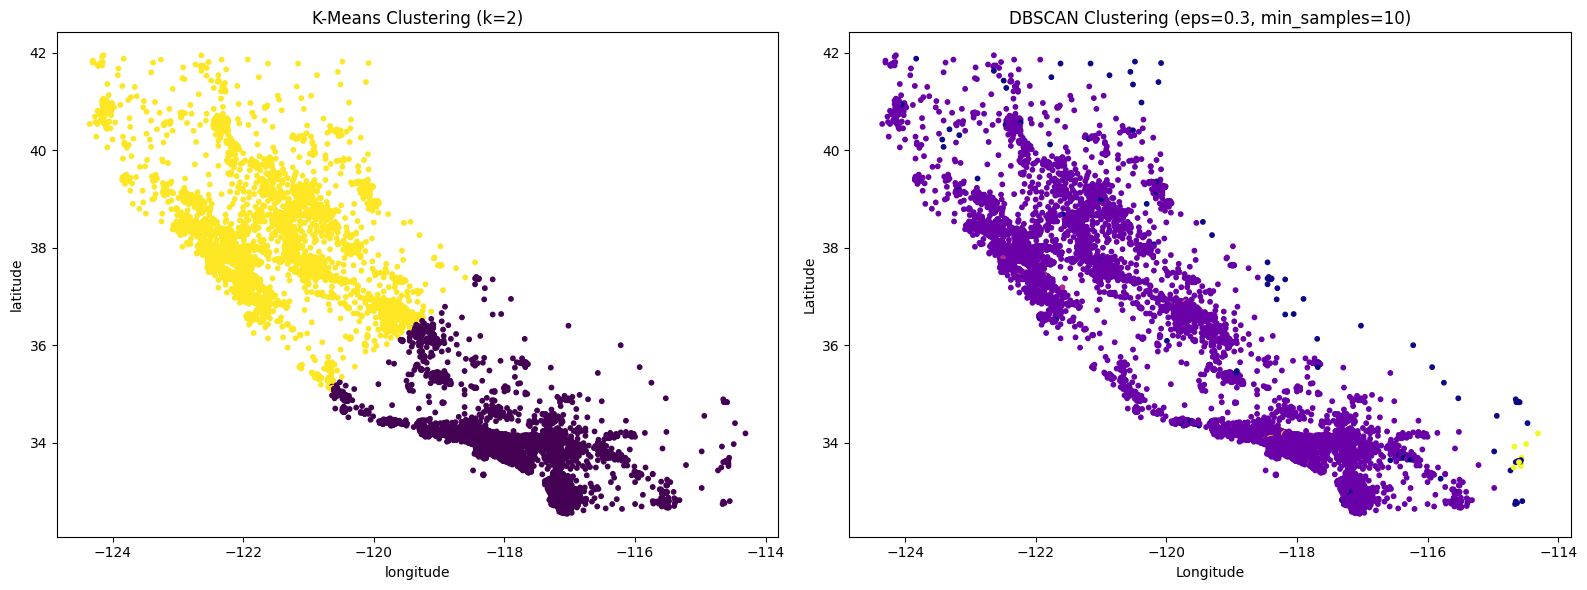

In [48]:
# 5. Visualize Results
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

axes[0].scatter(df['longitude'], df['latitude'], c=df['cluster'], cmap='viridis', s=10)
axes[0].set_title('K-Means Clustering (k=2)')
axes[0].set_xlabel('longitude')
axes[0].set_ylabel('latitude')

axes[1].scatter(df['longitude'], df['latitude'], c=df['DBSCAN_Cluster'], cmap='plasma', s=10)
axes[1].set_title('DBSCAN Clustering (eps=0.3, min_samples=10)')
axes[1].set_xlabel('Longitude')
axes[1].set_ylabel('Latitude')

plt.tight_layout()
plt.show()

. Interpretation of Each Algorithm’s Insight
K-Means: Macro-Level Economic Segmentation

Divides California into two main economic-geographic regions:

Southern California (Los Angeles, San Diego) — higher-income, coastal urban zones.

Northern/Central California (Sacramento, inland regions) — lower-income or rural areas.

Excellent for broad housing market segmentation or regional policy analysis.

DBSCAN: Micro-Level Urban Density Detection

Highlights high-density housing clusters (e.g., LA Basin, Bay Area, San Diego).

Labels rural and agricultural zones as noise due to low population density.

More suitable for detecting local housing markets, urban hotspots, or outlier neighborhoods.

⚖️ 5. Which Performs Better?
Context	Better Algorithm	Reason
Overall geographic segmentation	✅ K-Means	Clear regional patterns; simple, interpretable structure.
Urban density or hotspot detection	✅ DBSCAN	Identifies dense housing regions and excludes sparse areas.
Outlier handling	✅ DBSCAN	Naturally excludes low-density or unusual areas.
Ease of tuning and scalability	✅ K-Means	Only one parameter (k), faster on large datasets.
🏁 6. Summary

K-Means:

Performs better overall for this dataset, revealing large-scale, interpretable regional divisions (north vs. south California).

Ideal when you want simple, stable clusters and can predefine k.

DBSCAN:

Provides finer granularity, identifying dense urban clusters and outliers.

Useful if the goal is to analyze urban sprawl, city density, or non-uniform housing distributions.

However, it requires careful parameter tuning (eps, min_samples) and may underperform on evenly spread data.

🧭 Final Insight

K-Means captures California’s broad socioeconomic regions,
while DBSCAN reveals the localized density structure of its housing markets.